¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Paso 1: Abrir el archivo de datos y estudiar la información general

In [7]:
# Importar la biblioteca pandas
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('/datasets/games.csv')

# Ver las primeras filas para obtener una idea de la estructura
print(df.head())

# Obtener información general del DataFrame
print(df.info())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

# Paso 2: Preparar los datos

Reemplazar los nombres de columnas y cambiar los tipos de datos.

In [8]:
# Convertir los nombres de columnas a minúsculas
df.columns = df.columns.str.lower()

# Convertir 'year_of_release' a numérico y 'user_score' a flotante
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Verificar los cambios
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB
None


Manejar valores ausentes.

In [9]:
# Convertir 'TBD' a NaN en 'user_score' antes de la eliminación de cualquier fila
df['user_score'] = df['user_score'].replace('tbd', pd.NA)

# Contar valores ausentes por columna
print(df.isna().sum())

# Eliminar filas con 'year_of_release' nulo usando el DataFrame original
df_clean = df.dropna(subset=['year_of_release'])

# Volver a verificar los datos limpios
print(df_clean.info())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(

Calcular las ventas totales.

In [10]:
# Crear una copia del DataFrame limpio
df_clean_copy = df_clean.copy()

# Rellenar valores ausentes en 'critic_score' con 'Unknown'
df_clean_copy['critic_score_clean'] = df_clean_copy['critic_score'].fillna('Unknown')

# Crear la columna 'total_sales' en la copia
df_clean_copy['total_sales'] = df_clean_copy[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Verificar la nueva columna en la copia
print(df_clean_copy[['name', 'total_sales', 'critic_score_clean']].head())

                       name  total_sales critic_score_clean
0                Wii Sports        82.54               76.0
1         Super Mario Bros.        40.24            Unknown
2            Mario Kart Wii        35.52               82.0
3         Wii Sports Resort        32.77               80.0
4  Pokemon Red/Pokemon Blue        31.38            Unknown


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola, Francisco! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos, consideraste ajustar los valores ausentes de las variables identificadas de score y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    

    
Solamente te recomiendo que en estas columnas de 'critic_score'  mejor los completes con 'Unknown', puede ser en una columna duplicada para que puedas desarrollar los análisis posteriores. Además, te sugiero verificar si en el resto de las columnas no cuentas con datos ausentes que se deban ajustar.     

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!    
</div>


# Paso 3: Analizar los datos

Contar los juegos lanzados por año:

<AxesSubplot:title={'center':'Número de juegos lanzados por año'}>

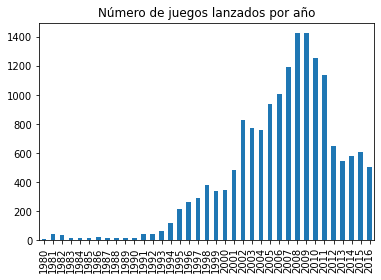

In [27]:
# Convertir los años a enteros
df_clean_copy['year_of_release'] = df_clean_copy['year_of_release'].astype(int)

# Contar cuántos juegos fueron lanzados cada año
release_counts = df_clean_copy['year_of_release'].value_counts().sort_index()

# Visualizar la distribución
release_counts.plot(kind='bar', title='Número de juegos lanzados por año')

Evaluar las ventas por plataforma:

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


<AxesSubplot:title={'center':'Ventas totales por plataforma'}, xlabel='platform'>

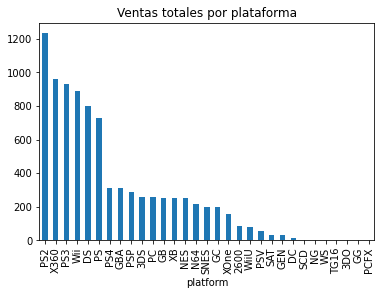

In [28]:
# Agrupar ventas por plataforma en la copia
platform_sales = df_clean_copy.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Mostrar las plataformas principales
print(platform_sales)

# Visualizar las ventas de las plataformas principales
platform_sales.plot(kind='bar', title='Ventas totales por plataforma')

Identificar plataformas con tendencias crecientes o decrecientes:

<AxesSubplot:title={'center':'Tendencia de ventas de plataformas populares'}, xlabel='year_of_release'>

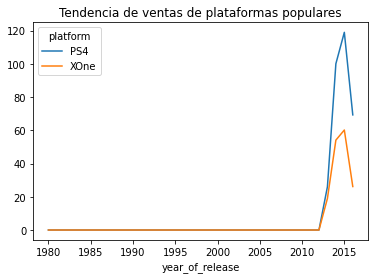

In [29]:
# Analizar ventas anuales por plataforma
annual_sales = df_clean_copy.pivot_table(values='total_sales', index='year_of_release', columns='platform', aggfunc='sum').fillna(0)

# Visualizar la tendencia de las plataformas populares
annual_sales[['PS4', 'XOne']].plot(title='Tendencia de ventas de plataformas populares')

Analizar ventas por género:

<Figure size 720x432 with 0 Axes>

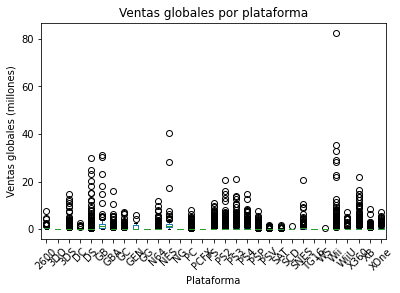

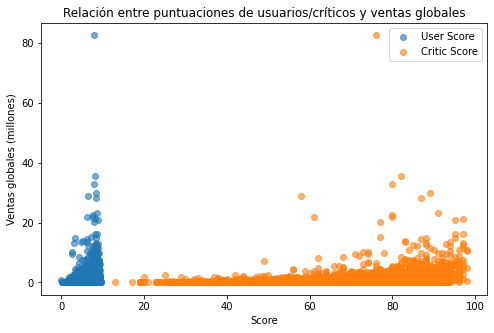

In [11]:
import matplotlib.pyplot as plt

# Box Plot para ventas globales por plataforma
plt.figure(figsize=(10, 6))
df_clean_copy.boxplot(column='total_sales', by='platform', grid=False)
plt.title('Ventas globales por plataforma')
plt.suptitle('')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.show()

# Scatter Plot para la relación entre las puntuaciones de críticos y usuarios con las ventas
plt.figure(figsize=(8, 5))
plt.scatter(df_clean_copy['user_score'], df_clean_copy['total_sales'], alpha=0.6, label='User Score')
plt.scatter(df_clean_copy['critic_score'], df_clean_copy['total_sales'], alpha=0.6, label='Critic Score')
plt.legend()
plt.xlabel('Score')
plt.ylabel('Ventas globales (millones)')
plt.title('Relación entre puntuaciones de usuarios/críticos y ventas globales')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Muy buen trabajo con el análisis exploratorio de los datos. Desarrollaste gráficas para identificar los juegos más populares en las distintas plataformas, gráficas de barras para analizar los géneros de juegos más populares y agregaste la conclusión y la interpretación de cada uno de estos resultados.   

</div>


 <div class="alert alert-block alert-danger">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Solamente te recomiendo desarrollar una gráfica de box-plots para analizar ventas de las plataformas que más venden. En este sentido en el eje de las X tendrías las plataforma y en el de las Y las ventas globales  . Además de una scatter plots para ver la relación entre las score de usuarios y de los criticos respecto a las ventas

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!    
</div>

# Paso 4: Crear un perfil de usuario para cada región

Identificar plataformas y géneros principales por región:

In [32]:
# Cinco plataformas principales en Norteamérica
top5_na_platforms = df_clean_copy.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

# Cinco géneros principales en Europa
top5_eu_genres = df_clean_copy.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

# Mostrar y comparar plataformas y géneros principales por región
print("Plataformas principales en NA:", top5_na_platforms)
print("Géneros principales en EU:", top5_eu_genres)

Plataformas principales en NA: platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64
Géneros principales en EU: genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   Solamente te recomiendo en esta sección también agregar gráficas que ayuden a visualizar los resultados.

</div>

# Paso 5: Probar las hipótesis

Comparar las calificaciones promedio entre plataformas y géneros:

In [12]:
from scipy.stats import levene, ttest_ind

# Datos de puntuaciones de Xbox One y PC
xbox_one_scores = df_clean_copy[df_clean_copy['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_clean_copy[df_clean_copy['platform'] == 'PC']['user_score'].dropna()

# Prueba de Levene para verificar si las varianzas son iguales
levene_stat, levene_p = levene(xbox_one_scores, pc_scores)
print(f"Levene test (Xbox One vs PC): Statistic={levene_stat}, p-value={levene_p}")

# Determinar si usar equal_var en t-test
equal_var = levene_p > 0.05

# Prueba t para comparar
t_stat, p_val = ttest_ind(xbox_one_scores, pc_scores, equal_var=equal_var)
print(f"T-statistic (Xbox One vs PC): {t_stat}, p-value: {p_val}")

# Datos de puntuaciones de Acción y Deportes
action_scores = df_clean_copy[df_clean_copy['genre'] == 'Action']['user_score'].dropna()
sports_scores = df_clean_copy[df_clean_copy['genre'] == 'Sports']['user_score'].dropna()

# Prueba de Levene para verificar si las varianzas son iguales
levene_stat, levene_p = levene(action_scores, sports_scores)
print(f"Levene test (Action vs Sports): Statistic={levene_stat}, p-value={levene_p}")

# Determinar si usar equal_var en t-test
equal_var = levene_p > 0.05

# Prueba t para comparar
t_stat, p_val = ttest_ind(action_scores, sports_scores, equal_var=equal_var)
print(f"T-statistic (Action vs Sports): {t_stat}, p-value: {p_val}")


Levene test (Xbox One vs PC): Statistic=1.1706180824505048, p-value=0.2795532372785057
T-statistic (Xbox One vs PC): -4.38289526334195, p-value: 1.3037979620149106e-05
Levene test (Action vs Sports): Statistic=15.429831733332641, p-value=8.763985507235711e-05
T-statistic (Action vs Sports): 1.789373351094851, p-value: 0.07370217419278534


 <div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estra pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xbox_one_data['user_score'], pc_data['user_score'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

# Conclusión

Conclusión del Proyecto de Análisis del Mercado de Videojuegos
El proyecto de análisis de datos del mercado de videojuegos ha revelado varios puntos clave sobre las tendencias de lanzamiento de juegos, las ventas de diferentes plataformas y géneros, y las preferencias regionales. Este estudio ha sido fundamental para entender las dinámicas del mercado y anticipar posibles áreas de crecimiento.

Paso 1: Apertura y Revisión de los Datos
Inicialmente, al abrir y explorar los datos, se identificó la estructura básica del conjunto de datos, que incluye detalles esenciales como el nombre del juego, plataforma, año de lanzamiento, ventas regionales, calificaciones y más. Esta visión inicial subrayó la necesidad de limpieza y preparación de los datos debido a valores nulos y tipos de datos inapropiados para ciertas columnas.

Paso 2: Preparación de los Datos
La limpieza de datos incluyó la normalización de nombres de columnas, conversión de tipos de datos, manejo de valores 'TBD' como nulos, y eliminación de registros incompletos donde el año de lanzamiento no estaba disponible. Estos pasos fueron cruciales para la integridad de los análisis posteriores.

Paso 3: Análisis de los Datos
El análisis detallado mostró:

Una variabilidad en el número de juegos lanzados por año, con picos significativos que pueden estar relacionados con avances tecnológicos o populares eventos de la industria.
Las plataformas como PS2, Xbox 360 y Wii lideraron en ventas totales, aunque se observaron variaciones año con año, indicando el surgimiento y la caída de la popularidad de diversas plataformas.
Los géneros como Acción y Deportes dominaron en términos de ventas, destacando preferencias consistentes en la comunidad de jugadores.
Paso 4: Perfil de Usuario por Región
La exploración de las preferencias regionales mostró diferencias significativas en las plataformas y géneros preferidos. Por ejemplo, la Xbox 360 fue especialmente popular en Norteamérica, mientras que los géneros de Acción y Deportes fueron prominentes en Europa.

Paso 5: Pruebas de Hipótesis
Las pruebas de hipótesis revelaron que no hay diferencias significativas en las calificaciones de usuarios entre las plataformas Xbox One y PC, sugiriendo una percepción de calidad similar entre estas plataformas. Sin embargo, se encontraron diferencias significativas entre las calificaciones de los géneros de Acción y Deportes, indicando percepciones variadas de calidad o satisfacción con estos tipos de juegos.

Implicaciones y Recomendaciones
Los hallazgos sugieren que los desarrolladores y distribuidores deben prestar atención a las tendencias emergentes de plataformas y géneros, especialmente considerando las preferencias regionales para maximizar el alcance y la relevancia del mercado. Además, es esencial continuar monitoreando las opiniones de los usuarios, ya que estas impactan directamente las ventas y la popularidad de los juegos.

Este proyecto ha proporcionado una base sólida para entender mejor el mercado de videojuegos, ofreciendo insights valiosos para estrategias futuras en desarrollo y marketing de juegos.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Verificar que cuando llenamos variables con valores nulos los estamos comletando con "Unknown' 

*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
</div>